In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

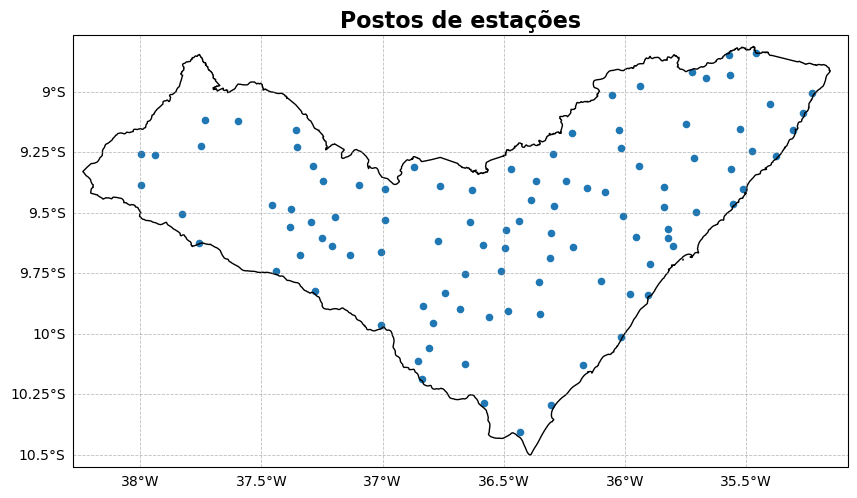

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-38.28, -35.08, -10.55, -8.768], ccrs.PlateCarree())
#ax.add_feature(cfeature.BORDERS)
#ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.STATES)
#ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.LAKES, alpha=1.0)
#ax.add_feature(cfeature.LAND)

#Ler shp
shape_feature = ShapelyFeature(shpreader.Reader('AL_UF_2021/AL_UF_2021.shp').geometries(),\
 ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=1.0)
ax.add_feature(shape_feature)

#Ler dados
df = pd.read_csv('AL_fab.csv', encoding='utf-8', sep=';', decimal=',')

#Plotar lat e lon
cs = ax.scatter(df['LONGITUDE'].values, df['LATITUDE'].values,\
                 transform=ccrs.PlateCarree(), marker='o', s=20)

#Linhas da grade e Coordenadas geográficas
gd = ax.gridlines(crs=ccrs.PlateCarree(), linestyle='--', color='gray', draw_labels=True, alpha=0.5, linewidth=0.6)
gd.right_labels = False
gd.top_labels = False

#colcoar o titulo
plt.title('Postos de estações', fontsize=16, fontweight='bold')

plt.savefig('Postos de estações.png', dpi=300, bbox_inches='tight')
plt.show()